In [ ]:
# import packages
import glob
import h5py
import pandas as pd

from src import io, roi, ttl, zdF
import os
import numpy as np

import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from matplotlib.gridspec import GridSpec
from matplotlib import colors

In [6]:
exp_date = '251014'
exp_num = '1701'

experiment_path = io.get_experiment(exp_date, exp_num)
supervox_path = io.get_file(experiment_path, 'processed', '*supervoxels.h5')
labels_path = io.get_file(experiment_path, 'processed', '*labels.h5')
print(supervox_path, labels_path)

# open h5 and pull data
with h5py.File(labels_path, 'r') as labels_hf:
    cluster_labels = labels_hf['labels'][...]

with h5py.File(supervox_path,'r') as supervox_hf:
    ca_signal = supervox_hf['ca_signal'][...]
    fictrac_sp = supervox_hf['smoothed_speed'][...]
    fictrac_t = supervox_hf['fictrac_time'][...]
    camera_fr = supervox_hf['camera_fr'][...]
    scope_fr = supervox_hf['scope_fr'][...]
    brain_dim = supervox_hf['brain_dimensions'][...]

# maui time conversions
frames = [x for x in range(1, ca_signal.shape[-1])]
volume_per_s = scope_fr/ca_signal.shape[0] # volume rate in Hz
maui_time = [0] + [x / volume_per_s for x in frames]

brain_dim= brain_dim.reshape(-1)
# fictrac time conversions
fic_time = fictrac_t / camera_fr

dat_path = io.get_file(experiment_path,'raw', '.dat')
fictrac_data = pd.DataFrame(pd.read_csv(dat_path, header=None))

/home/ptarabishi/repos/ROI_analysis/251014_1701/processed/251014_1701_supervoxels.h5 /home/ptarabishi/repos/ROI_analysis/251014_1701/processed/251014_1701_labels.h5


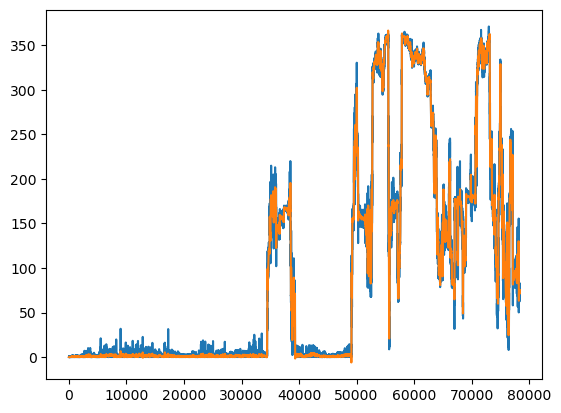

In [ ]:
inst_speed = np.rad2deg(fictrac_data[18])

# for window size of 500 ms
win_size = int(.5 * camera_fr)
smoothed_speed = savgol_filter(inst_speed, win_size, 3)

plt.plot(inst_speed)
plt.plot(smoothed_speed)

In [32]:
np.min(smoothed_speed)

-6.0514213112941215

Text(0.5, 1.0, 'xy position colored by velocity')

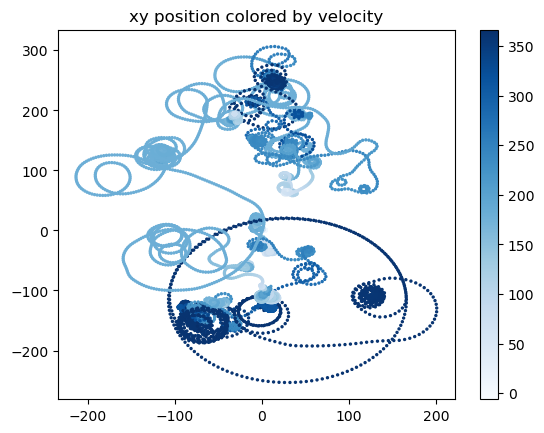

In [42]:
x_pos = fictrac_data[14]
y_pos = fictrac_data[15]
colors = smoothed_speed

plt.scatter(x_pos, y_pos, c=colors, cmap='Blues', s=2)
plt.colorbar()
plt.title('xy position colored by velocity')

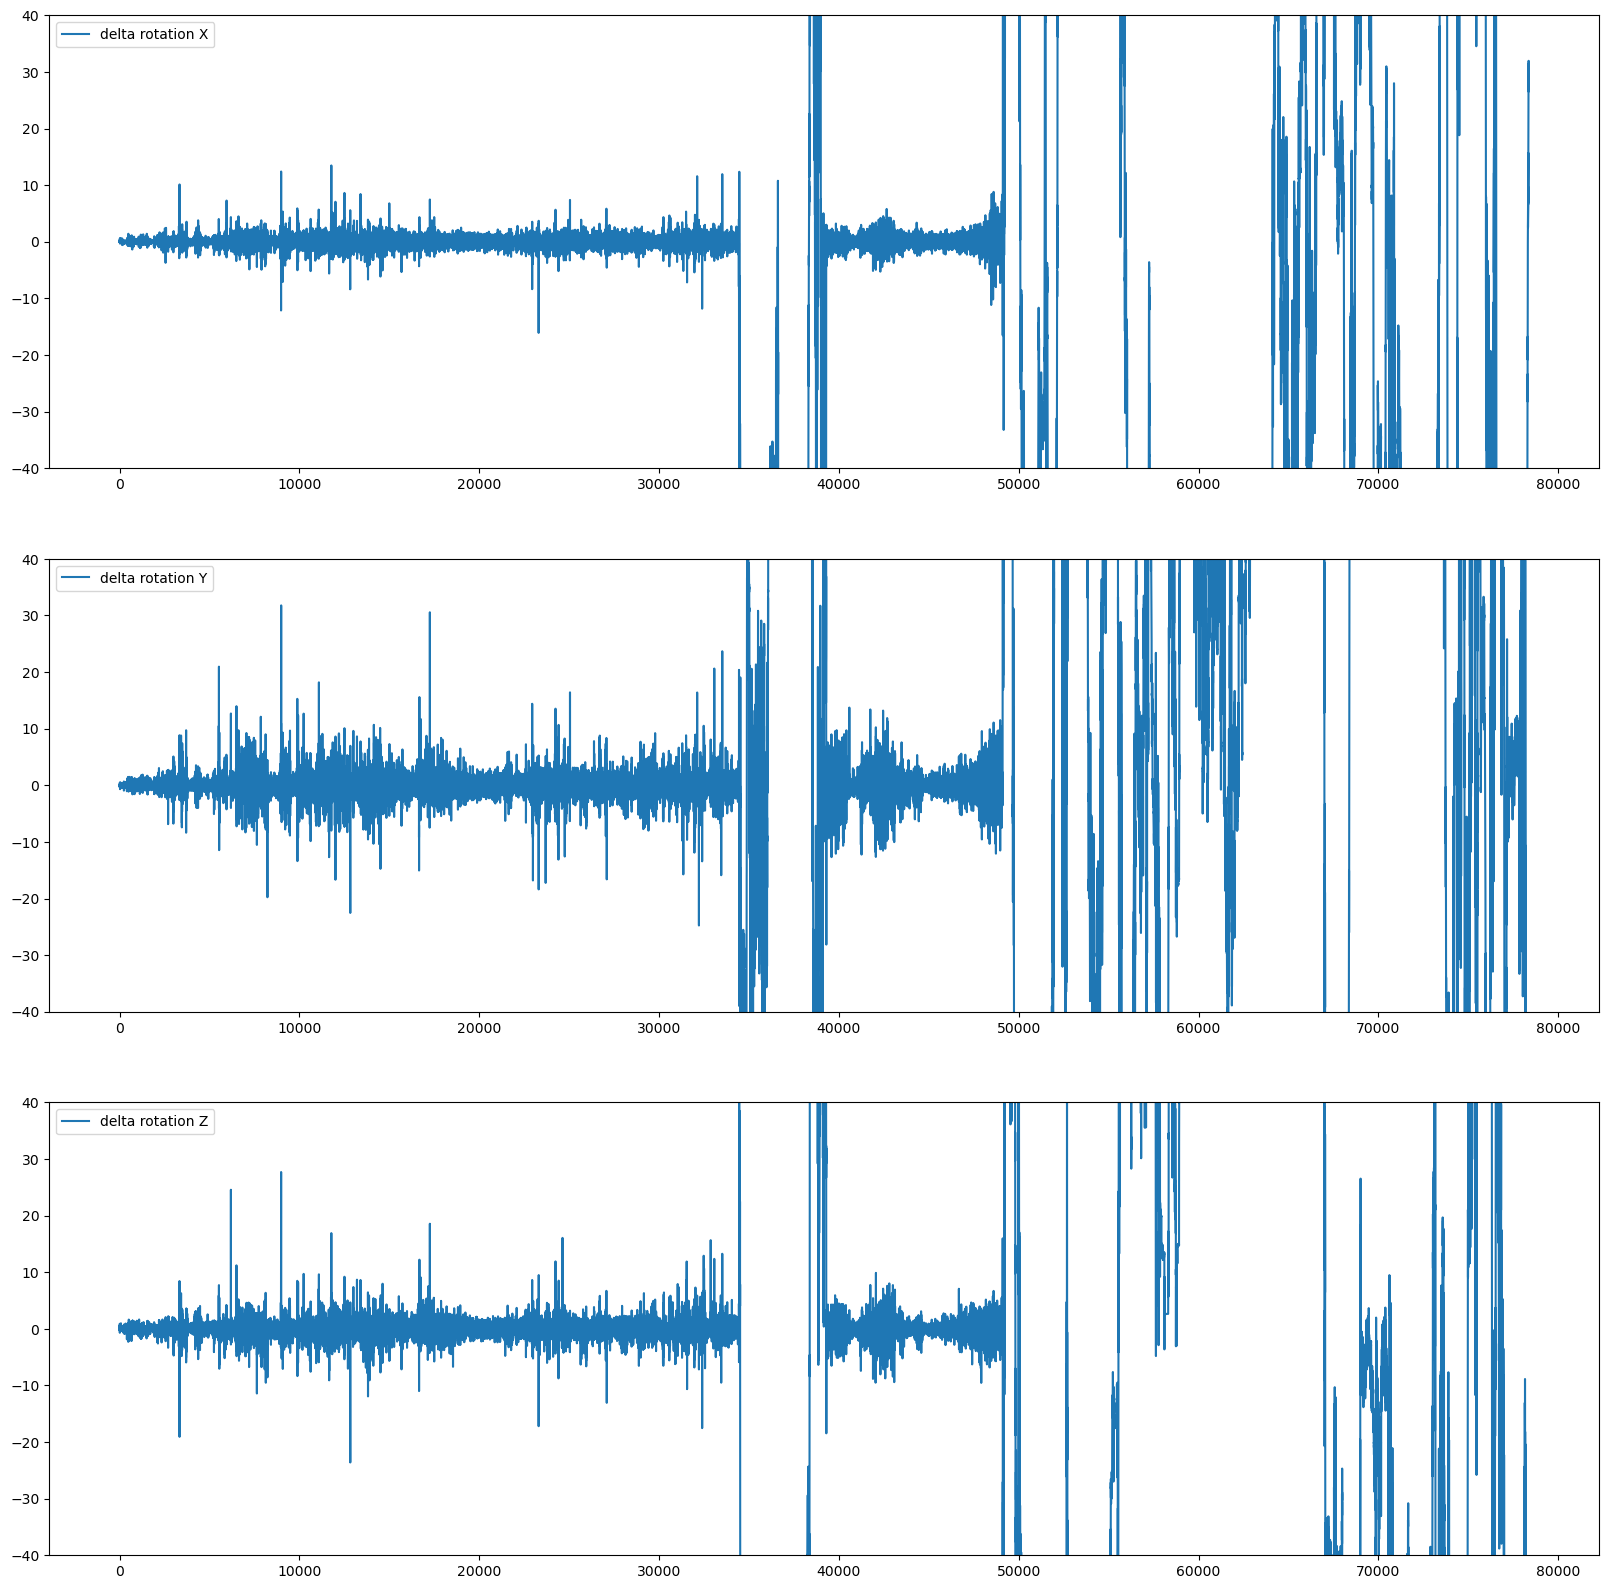

In [ ]:
fig = plt.figure(figsize=(20,20))
gs = GridSpec(nrows=3, ncols=1, figure=fig)
ax0=fig.add_subplot(gs[0])
ax0.plot(np.rad2deg(fictrac_data[5]), label='delta rotation X')
plt.ylim(-40,40)
plt.legend()

ax1=fig.add_subplot(gs[1])
ax1.plot(np.rad2deg(fictrac_data[6]), label='delta rotation Y')
plt.ylim(-40,40)
plt.legend()

ax2=fig.add_subplot(gs[2])
ax2.plot(np.rad2deg(fictrac_data[7]), label='delta rotation Z')
plt.ylim(-40,40)
plt.legend()